In [1]:
### necessary libs
import os
from glob import glob
from tqdm.auto import tqdm
import PIL
from PIL import Image
from PIL import ImageFont, ImageDraw
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import sys
import requests
import tarfile
import json
from IPython.display import clear_output
%matplotlib inline

## publay data debug

In [2]:
# fname = 'examples.tar.gz'
# url = 'https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/' + fname
# r = requests.get(url)
# open(fname , 'wb').write(r.content)

In [3]:
# # Extracting the dataset
# fname = 'examples.tar.gz'
# tar = tarfile.open(fname)
# tar.extractall()
# tar.close()

In [4]:
# Parse the JSON file and read all the images and labels
with open('examples/samples.json', 'r') as fp:
    samples = json.load(fp)
# Index images
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "examples/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)

In [5]:
# # PMC5618295_00004
# images
## Take one image

_annotations = images[417386]['annotations'] 
# annotations

['নিমগনা', ' ', 'প্রতিদ্বন্দ্ব', ' ', 'মেন্দি', ' ', 'মলিনত্ব', ' ', 'শকরকন্দ', ' ', 'বাঁজা', ' ', 'আপদ', ' ', 'অদূরদর্শিনী', ' ']


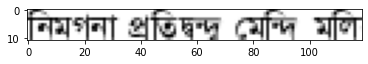

In [6]:
from coreLib.text import create_word_image

len_word = random.randint(4,15)
demo_img = create_word_image(len_word, 120, 14)
plt.imshow(demo_img)
plt.show()
# cv2.imwrite("need_space.png",demo_img)

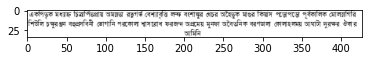

In [7]:
from coreLib.config import config
from coreLib.text import fit_text

_w, _h = 427, 34
text_color = (0, 0, 0)
font_size = 10
img = fit_text(_w, _h, text_color, config.bangla_font_dir, font_size)
plt.imshow(img)
plt.show()

# img.save('my_icon.png')


5
len of bn text:  10
len of bn text:  10
len of bn text:  10
Height: --  7


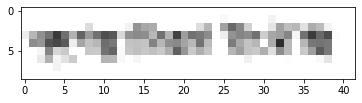

In [8]:
# Width: 62, Height: 14

# Width: 44, Height: 9
# Category:  text

_w, _h = 42, 9
text_color = (0, 0, 0)
if _h < 10 and 80 < _w < 115:
    font_size=_h 
elif _h < 10 and _w < 80:
    font_size=5
else:
    font_size=_h
print(font_size)
img = fit_text(_w, _h, text_color, config.bangla_font_dir, font_size)
plt.imshow(img)
plt.show()

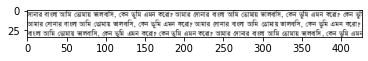

In [9]:
from coreLib.text import draw_multiple_line_text

_w, _h = 427, 34
text_color = (0, 0, 0)
font_size = 10
text = "আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো? আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো? কেন তুমি এমন করো? আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো? আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো? আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো? কেন তুমি এমন করো? আমার সোনার বাংলা আমি তোমায় ভালবাসি, কেন তুমি এমন করো?"

char_numbers = 120
img = draw_multiple_line_text(text, _w, _h, text_color, font_size, char_numbers)
plt.imshow(img)
plt.show()

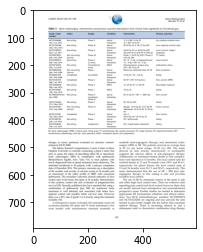

Image size: (596, 794)


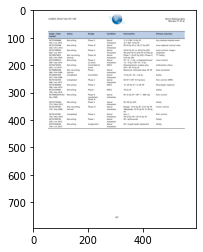

Width: 239, Height: 21
Category:  text
Width: 239, Height: 199
Category:  text
len of bn text:  110
Height: --  150
Width: 239, Height: 136
Category:  text
len of bn text:  100
Width: 239, Height: 31
Category:  text
Width: 239, Height: 115
Category:  text
Width: 476, Height: 9
Category:  text
len of bn text:  1
Height: --  9
Width: 469, Height: 16
Category:  text
len of bn text:  20
Height: --  12
Width: 496, Height: 354
Category:  table


In [10]:
### PMC4760359_00006
# ======================================================
image = Image.open('./examples/PMC4760359_00006.jpg') ### Id: 417386
plt.imshow(image)
plt.show()
# ================================================
_myImage = image.copy()
print("Image size:", _myImage.size)

# ================================================
draw = ImageDraw.Draw(_myImage, 'RGBA')
for annotation in _annotations:
    _cat = samples['categories'][annotation['category_id'] - 1]['name']

    if _cat in ['figure', 'table']:
        continue
    else:
        # Draw segmentation: fill white
        draw.polygon(annotation['segmentation'][0],
                     fill=(255,255,255,255))
    
_myImage = np.asarray(_myImage, dtype=np.uint8)
_newImage = _myImage.copy()
plt.imshow(_newImage)
plt.show()

# ===================================================
# draw = ImageDraw.Draw(image, 'RGBA')
for annotation in _annotations:
    
    x1=int(annotation['bbox'][0])
    y1=int(annotation['bbox'][1])
    x2=int(annotation['bbox'][0] + annotation['bbox'][2])
    y2=int(annotation['bbox'][1] + annotation['bbox'][3])
    
    _w = int(x2-x1)
    _h = int(y2-y1)
    print("Width: {}, Height: {}".format(_w, _h))
    
    _cat = samples['categories'][annotation['category_id'] - 1]['name']
    print("Category: ", _cat)
    
    text_color = (0, 0, 0)
    font_dir = config.bangla_font_dir #'./fonts/Bangla.ttf'

    if _cat in ['figure', 'table']:
        continue
    
    elif _cat == 'text':
        if _h < 10 and 80 < _w < 115:
            font_size = _h
        elif _h < 10 and _w < 80:
            font_size = 5
        elif _w < 100:
            font_size=7
        else:
            if _h < 10:
                font_size=_h
            else:
                font_size=10

        img = fit_text(_w, _h, text_color, font_dir, font_size)
        img = np.asarray(img, dtype=np.uint8)
        newImg = img.copy()
        _newImage[y1:y2,x1:x2]=newImg
        
    elif _cat == 'title':
        if _h < 10 and 80 < _w < 115:
            font_size=_h
        elif _h < 10 and _w < 80:
            font_size=5
        elif _w < 100:
            font_size=7
        else:
            font_size=_h

        img = fit_text(_w, _h, text_color, font_dir, font_size)
        img = np.asarray(img, dtype=np.uint8)
        newImg = img.copy()
        _newImage[y1:y2,x1:x2]=newImg
        
    elif _cat == 'list':
        if _h < 8 and 80 < _w < 115:
            font_size = _h
        elif _h < 8 and _w < 80:
            font_size = 5
        elif _w < 100:
            font_size=7
        else:
            if _h < 8:
                font_size=_h
            else:
                font_size=8

        img = fit_text(_w, _h, text_color, font_dir, font_size)
        img = np.asarray(img, dtype=np.uint8)
        newImg = img.copy()
        _newImage[y1:y2,x1:x2]=newImg

####ORIGINAL IMAGE####


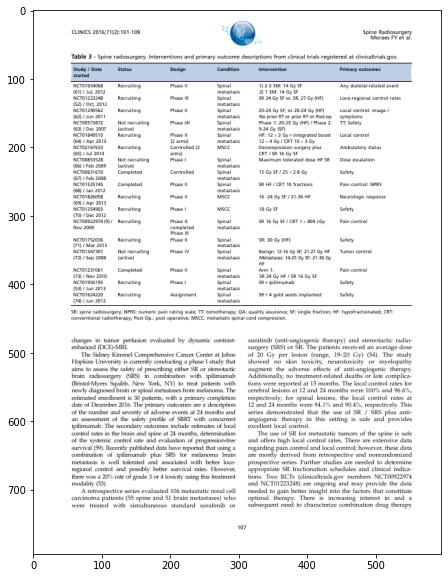

####GENERATED IMAGE####


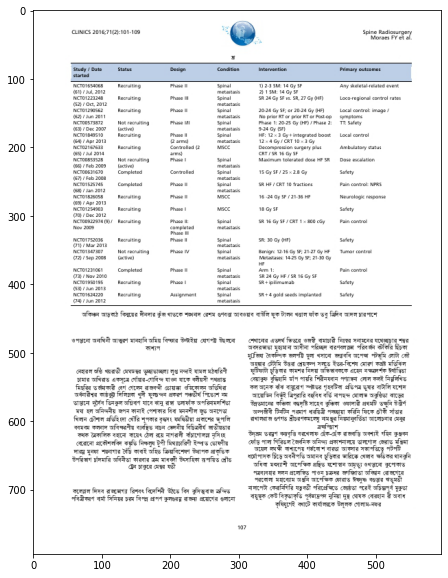

In [11]:
print("####ORIGINAL IMAGE####")
fig=plt.figure(figsize=(16, 10)) 
plt.imshow(image)
plt.show()

print("####GENERATED IMAGE####")
fig=plt.figure(figsize=(16, 10)) 
plt.imshow(_newImage)
plt.show()

In [12]:
cv2.imwrite("./output_examples/bn_PMC4760359_00006.jpg",_newImage)
# newImage.save('bn_PMC5618295_00004.jpg')

True

In [13]:
from coreLib.config import config
from coreLib.text import fit_text

# Function to viz the annotation and create new image
def markup(image, annotations):
    '''
         Draws the segmentation, bounding box, and label of each annotation
    '''
    # myImage = np.asarray(image, dtype=np.uint8)
    myImage = image.copy()

    draw = ImageDraw.Draw(myImage, 'RGBA')
    
    myImage = np.asarray(myImage, dtype=np.uint8)
    newImage = myImage.copy()
    
    # ================================================
    for annotation in annotations:
        _cat = samples['categories'][annotation['category_id'] - 1]['name']

        if _cat in ['figure', 'table']:
            continue
        else:
            # Draw segmentation: fill white
            draw.polygon(annotation['segmentation'][0],
                        fill=(255,255,255,255))

    # ===================================================
        
        x1=int(annotation['bbox'][0])
        y1=int(annotation['bbox'][1])
        x2=int(annotation['bbox'][0] + annotation['bbox'][2])
        y2=int(annotation['bbox'][1] + annotation['bbox'][3])
        
        _w = int(x2-x1)
        _h = int(y2-y1)
        print("Width: {}, Height: {}".format(_w, _h))
        
        _cat = samples['categories'][annotation['category_id'] - 1]['name']
        print("Category: ", _cat)
        
        text_color = (0, 0, 0)
        font_dir = config.bangla_font_dir #'./fonts/Bangla.ttf'

        if _cat in ['figure', 'table']:
            continue
        
        elif _cat == 'text':
            '''
            if _h < 10 and 80 < _w < 115:
                font_size = _h
            elif _h < 10 and _w < 80:
                font_size = 5
            elif _w < 100:
                font_size=7
            else:
                if _h < 10:
                    font_size=_h
                else:
                    font_size=10
            '''
            if _h < 10:
                font_size=_h
            else:
                font_size=10
            img = fit_text(_w, _h, text_color, font_dir, font_size)
            img = np.asarray(img, dtype=np.uint8)
            newImg = img.copy()
            newImage[y1:y2,x1:x2]=newImg
            
        elif _cat == 'title':
            '''
            if _h < 10 and 80 < _w < 115:
                font_size=_h
            elif _h < 10 and _w < 80:
                font_size=5
            elif _w < 100:
                font_size=7
            else:
                # Width: 55, Height: 12
                font_size=_h
            '''
            if _h >= 10:
                font_size=_h
            else:
                font_size=9

            img = fit_text(_w, _h, text_color, font_dir, font_size)
            img = np.asarray(img, dtype=np.uint8)
            newImg = img.copy()
            newImage[y1:y2,x1:x2]=newImg
            
        elif _cat == 'list':
            '''
            if _h < 8 and 80 < _w < 115:
                font_size = _h
            elif _h < 8 and _w < 80:
                font_size = 5
            elif _w < 100:
                font_size=7
            else:
                if _h < 8:
                    font_size=_h
                else:
                    font_size=8
            '''
            if _h < 8:
                font_size=_h
            else:
                font_size=8
            img = fit_text(_w, _h, text_color, font_dir, font_size)
            img = np.asarray(img, dtype=np.uint8)
            newImg = img.copy()
            newImage[y1:y2,x1:x2]=newImg

    return np.array(newImage)

<ipython-input-14-2f578a3eebe6>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = plt.subplot(len(images) / 2, 2, i + 1)


FILE:  examples/PMC5491943_00004.jpg
Width: 428, Height: 35
Category:  text
Width: 428, Height: 46
Category:  text
Width: 428, Height: 84
Category:  text
Width: 428, Height: 108
Category:  text
len of bn text:  110
Height: --  82
Width: 215, Height: 11
Category:  text
Width: 341, Height: 11
Category:  text
Width: 428, Height: 59
Category:  text
Width: 428, Height: 222
Category:  list
len of bn text:  110
Height: --  60
Width: 105, Height: 12
Category:  title
len of bn text:  1
Height: --  12
Width: 62, Height: 14
Category:  title
i: 0, save dir: ./output_examples/PMC5491943_00004.jpg
Time in Seconds:  28.99559156900068
FILE:  examples/PMC5302692_00002.jpg
Width: 473, Height: 126
Category:  text
len of bn text:  110
Height: --  82
Width: 470, Height: 126
Category:  text
len of bn text:  110
Height: --  72
Width: 470, Height: 111
Category:  text
len of bn text:  110
Height: --  72
Width: 470, Height: 63
Category:  text
len of bn text:  88
Height: --  60
Width: 470, Height: 159
Category: 

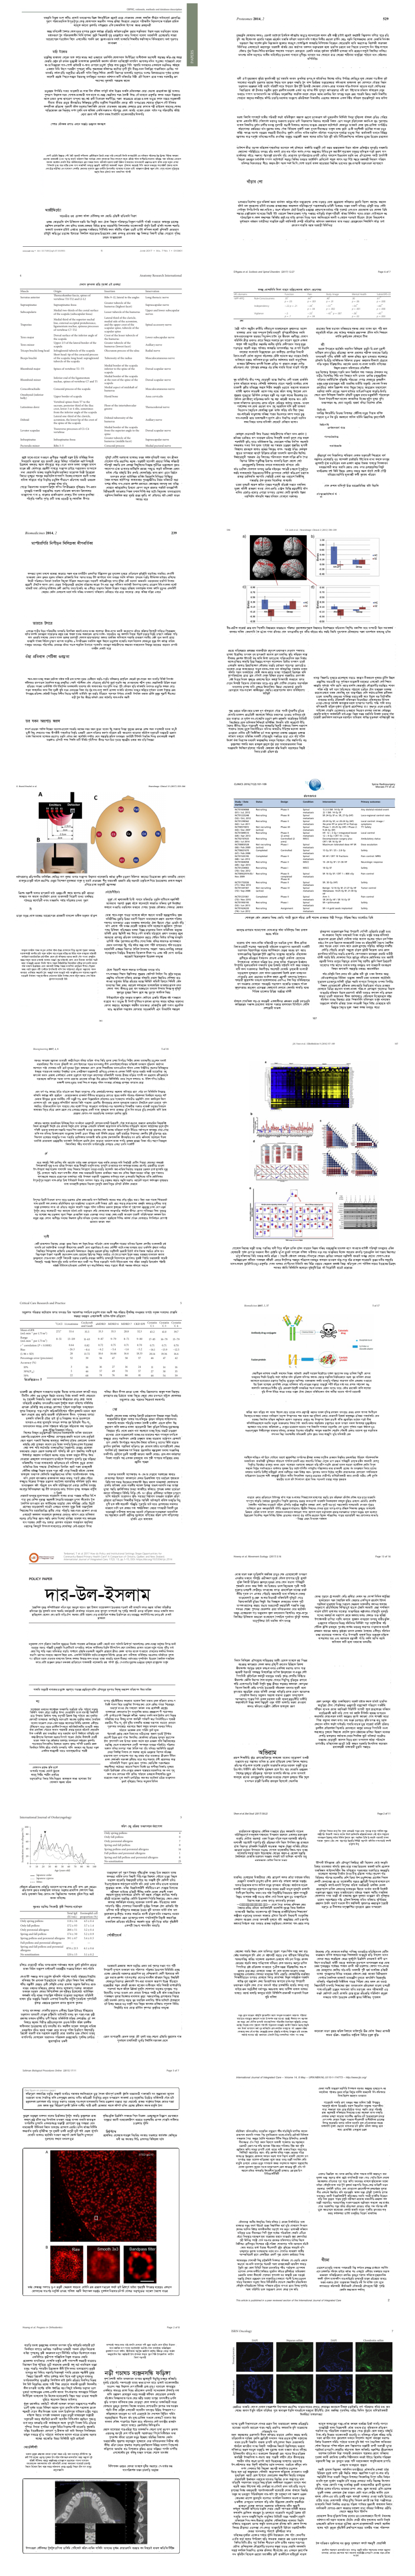

In [14]:
# Visualize annotations
# font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
import time
save_root_dir = "./output_examples/" 
fig=plt.figure(figsize=(16, 100)) 
for i, (h, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(len(images) / 2, 2, i + 1)

        start_time = time.monotonic()
        print("FILE: ", image['file_name'])
        _file= image['file_name']
        _file_name = _file.split('/')[-1]
        create_img = markup(img, image['annotations'])
        save_dir = os.path.join(save_root_dir, _file_name)
        cv2.imwrite(save_dir, create_img)
        print("i: {}, save dir: {}".format(i, save_dir))
        print('Time in Seconds: ', time.monotonic() - start_time)

        ax.imshow(create_img)
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)